# Deutsch-Jozsa Analysis

In [2]:
import scipy.integrate as integrate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
from sympy import symbols, Eq, solve

In [3]:
def csv_reader(path):
    path = "/Users/emmahughes/Downloads/" + path + ".csv"
    data = pd.read_csv(path, header=None)
    x = np.array(data.iloc[:,0])[15000:18000]
    y = np.array(data.iloc[:,1])[15000:18000]
    return x, y


def get_avg(path0, path1, path2, title):
        x, y0 = csv_reader(path0)
        x, y1 = csv_reader(path1)
        x, y2 = csv_reader(path2)
        y_avg = (y0 + y1 + y2) / 3
        plt.plot(x, y_avg, label = 'Data')
        plt.ylabel('Amplitude (1/Hz)')
        plt.xlabel('Frequency (ppm)')
        plt.title('DJ with' + title)
        return x, y_avg


def lorentzian(x, x0, gamma, amplitude):
    return amplitude * (0.5*gamma) / ((x - x0)**2 + (0.5*gamma)**2)


def integrate_peaks(x, y, peak1_start, peak2_start, width):
    peak1_end, peak2_end = peak1_start + width, peak2_start + width

    # OPTIONAL- plot peak integration bounds
    #plt.plot(x[peak1_start], y[peak1_start], 'y', marker = 'x', markeredgewidth = 3, markersize=10)
    #plt.plot(x[peak1_end], y[peak1_end], 'y', marker = 'x', markeredgewidth = 3, markersize=10)
    #plt.plot(x[peak2_end], y[peak2_end], 'y', marker = 'x', markeredgewidth = 3, markersize=10)
    #plt.plot(x[peak2_start], y[peak2_start], 'y', marker = 'x', markeredgewidth = 3, markersize=10)

    peak1_integral = trapezoid(y[peak1_start:peak1_end], x[peak1_start:peak1_end])
    peak2_integral = trapezoid(y[peak2_start:peak2_end], x[peak2_start:peak2_end])

    print('peak 1:', peak1_integral)
    print('peak 2:', peak2_integral)

    return peak1_integral, peak2_integral

def rho_from_peaks(peak1, peak2):
    # Define the variables
    a, b, c, d = symbols('a b c d')

    # Equations to obtain a,b,c,d
    eq1 = Eq(a - c, peak1)
    eq2 = Eq(b - d, peak2)
    eq3 = Eq(a + b + c + d, 1)
    eq4 = Eq((a+c)/(b+d),  peak1/peak2)

    # Solve the equations
    solutions = solve((eq1, eq2, eq3, eq4), (a, b, c, d), dict=True)
    print(solutions)
    return solutions

width = 400
peak1_start, peak2_start = 500, 1900

-6 = const output 0

-7 = bal cnot x so 0-1 1-0

-8 = bal cnot s0 0-0 1-1

-9 = const output 1

# Oracle f0 - Constant

peak 1: 0.09766482443679633
peak 2: 0.5243255328908834
[{a: 0.127342330648970, b: 0.683652848014870, c: 0.0296775062121734, d: 0.159327315123987}]


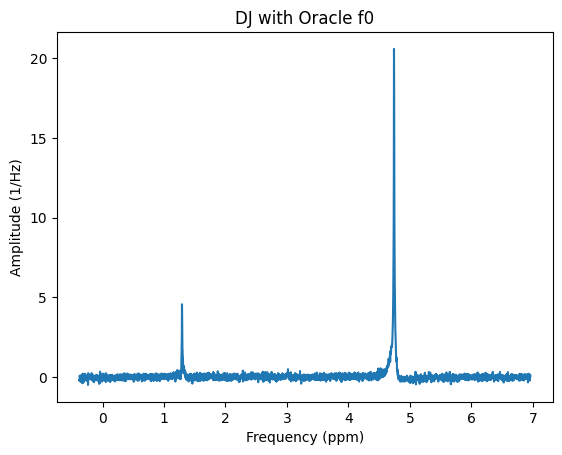

In [4]:
n = '2'
x, y = get_avg("P0-"+n, "P1-"+n, 'P2-'+n, ' Oracle f0')
peak1, peak2 = integrate_peaks(x, y, peak1_start, peak2_start, width)
solutions = rho_from_peaks(peak1, peak2)

# Oracle f1 - Constant

peak 1: 0.09766482443679633
peak 2: 0.5243255328908834
[{a: 0.127342330648970, b: 0.683652848014870, c: 0.0296775062121734, d: 0.159327315123987}]


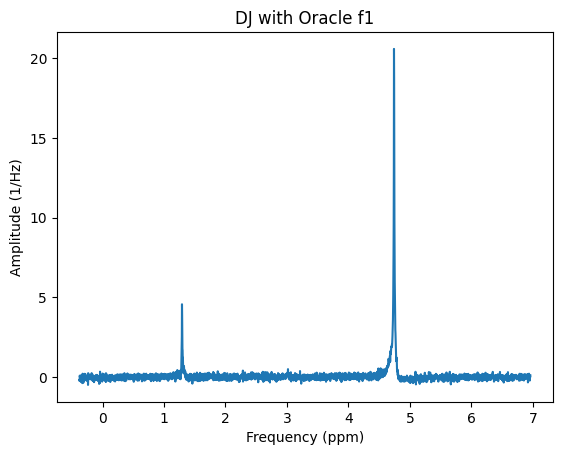

In [5]:
n = '3'
x, y = get_avg("P0-"+n, "P1-"+n, 'P2-'+n, ' Oracle f1')
peak1, peak2 = integrate_peaks(x, y, peak1_start, peak2_start, width)
solutions = rho_from_peaks(peak1, peak2)

# Oracle f3 - Balanced

peak 1: -0.010325063299799458
peak 2: -0.5286988792263903
[{a: 0.00441502371008113, b: 0.226073005026824, c: 0.0147400870098806, d: 0.754771884253214}]


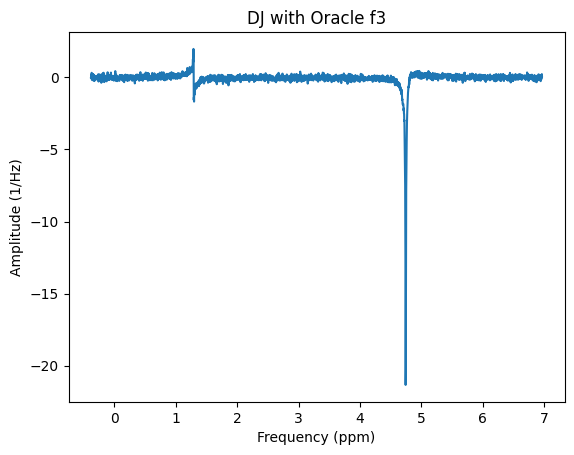

In [7]:
n = '5'
x, y = get_avg("P0-"+n, "P1-"+n, 'P2-'+n, ' Oracle f3')
peak1, peak2 = integrate_peaks(x, y, peak1_start, peak2_start, width)
solutions = rho_from_peaks(peak1, peak2)

# Oracle f4 - Balanced

peak 1: -0.013928242903047162
peak 2: -0.4573763833752379
[{a: 0.00781214227097924, b: 0.256535544589878, c: 0.0217403851740264, d: 0.713911927965116}]


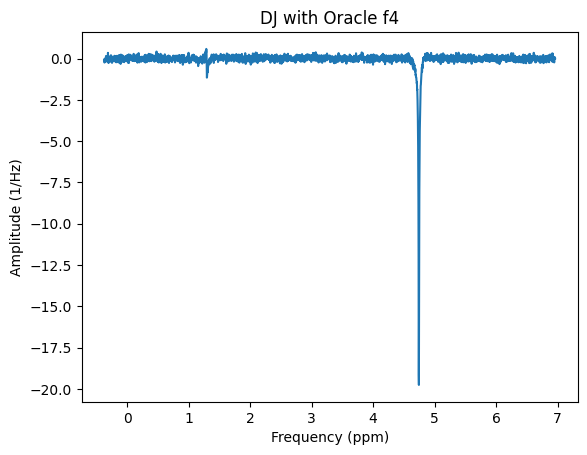

In [6]:
n = '4'
x, y = get_avg("P0-"+n, "P1-"+n, 'P2-'+n, ' Oracle f4')
peak1, peak2 = integrate_peaks(x, y, peak1_start, peak2_start, width)
solutions = rho_from_peaks(peak1, peak2)